# 数据读取

In [2]:
import pandas as pd
# beijing polution
p_bj_aq = '/home/lifuzhen/KDD2018/beijing_17_18_aq.csv'
df_bj_aq = pd.read_csv(p_bj_aq)
# beijing meo
p_bj_meo = '/home/lifuzhen/KDD2018/beijing_17_18_meo.csv'
df_bj_meo = pd.read_csv(p_bj_meo)
# beijing meo grid
p_bj_grid = '/home/lifuzhen/KDD2018/Beijing_historical_meo_grid.csv'
df_bj_grid = pd.read_csv(p_bj_grid)
# london meo grid
p_ld_grid = '/home/lifuzhen/KDD2018/London_historical_meo_grid.csv'
df_ld_grid = pd.read_csv(p_ld_grid)
# london polution1
p_ld_aq1 = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/London_historical_aqi_forecast_stations_20180331.csv'
df_ld_aq1 = pd.read_csv(p_ld_aq1)
# london polution2
p_ld_aq2 = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/London_historical_aqi_other_stations_20180331.csv'
df_ld_aq2 = pd.read_csv(p_ld_aq2)

df_bj_aq.describe()
df_bj_meo.head()

/home/liyouru/virtual_tf1.3_python2.7/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [3]:
longitude = list(df_bj_meo['longitude'])
latitude = list(df_bj_meo['latitude'])
utc_time = list(df_bj_meo['utc_time'])
wind_direction = list(df_bj_meo['wind_direction'])
wind_speed = list(df_bj_meo['wind_speed'])
temperature = list(df_bj_meo['temperature'])
pressure = list(df_bj_meo['pressure'])
humidity = list(df_bj_meo['humidity'])

print df_bj_meo.shape
df_bj_meo.describe()

(158047, 10)


,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,157813.000000,157813.000000
mean,116.395672,40.047275,38.182775,1026.798200,354.312894,35487.471178,96.933881
std,0.395223,0.264798,5030.694816,5025.748455,17423.723518,184454.823456,9748.857634
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,78.000000,0.900000
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,190.000000,1.500000
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,280.000000,2.500000
max,117.117778,40.658889,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


# 利用网格数据对观北京测点气象数据进行补全

In [4]:
from tqdm import tqdm 

bj_grid_meo = {}

g_longitude = list(df_bj_grid['longitude'])
g_latitude = list(df_bj_grid['latitude'])
g_utc_time = list(df_bj_grid['utc_time'])
g_temperature = list(df_bj_grid['temperature'])
g_pressure = list(df_bj_grid['pressure'])
g_humidity = list(df_bj_grid['humidity'])
g_wind_drirection = list(df_bj_grid['wind_direction'])
g_wind_speed = list(df_bj_grid['wind_speed/kph'])

for i in tqdm(range(7034706)):
    t_key = str(g_longitude[i]) + str(g_latitude[i]) + str(g_utc_time[i])
    bj_grid_meo.setdefault(t_key,[]).append(g_temperature[i])
    bj_grid_meo.setdefault(t_key,[]).append(g_pressure[i])
    bj_grid_meo.setdefault(t_key,[]).append(g_humidity[i])
    bj_grid_meo.setdefault(t_key,[]).append(g_wind_drirection[i])
    bj_grid_meo.setdefault(t_key,[]).append(g_wind_speed[i])

100%|██████████| 7034706/7034706 [00:44<00:00, 157189.49it/s]


In [5]:
import numpy as np

for i in tqdm(range(len(temperature))):
    if np.isnan(wind_direction[i]) or wind_direction[i] > 360:
        t_key = str(round(longitude[i],1)) + str(round(latitude[i],1)) + str(utc_time[i])
        wind_direction[i] = bj_grid_meo[t_key][3]
    if np.isnan(wind_speed[i]) or wind_speed[i] > 100:
        t_key = str(round(longitude[i],1)) + str(round(latitude[i],1)) + str(utc_time[i])
        wind_speed[i] = bj_grid_meo[t_key][4]
    if temperature[i] > 50:
        t_key = str(round(longitude[i],1)) + str(round(latitude[i],1)) + str(utc_time[i])
        temperature[i] = bj_grid_meo[t_key][0]
    if pressure[i] == 999999:
        t_key = str(round(longitude[i],1)) + str(round(latitude[i],1)) + str(utc_time[i])
        pressure[i] = bj_grid_meo[t_key][1]
    if humidity[i] == 999999:
        t_key = str(round(longitude[i],1)) + str(round(latitude[i],1)) + str(utc_time[i])
        humidity[i] = bj_grid_meo[t_key][2]

100%|██████████| 158047/158047 [00:00<00:00, 206907.91it/s]


In [6]:
n_df_bj_meo = []
n_df_bj_meo.append(list(df_bj_meo['station_id']))
index = [longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed]
for each in index:
    n_df_bj_meo.append(each)
n_df_bj_meo.append(list(df_bj_meo['weather']))

c_index = ['station_id','longitude','latitude','utc_time','temperature','pressure','humidity','wind_direction','wind_speed','weather']
df_bj_meo_full = pd.DataFrame(np.transpose(n_df_bj_meo) ,index = None, columns = c_index)

p_bj_meo_full = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/'
df_bj_meo_full.to_csv(p_bj_meo_full + 'beijing_17_18_meo_full.csv')

df_bj_meo_full.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615277778,40.1266666667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615277778,40.1266666667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615277778,40.1266666667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615277778,40.1266666667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615277778,40.1266666667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


# 利用网格数据生成伦敦观测点气象数据

In [8]:
p_ld_stp = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/london_station_position.csv'
df_ld_stp = pd.read_csv(p_ld_stp)

stp_longitude = list(df_ld_stp['Longitude'])
stp_latitude = list(df_ld_stp['Latitude'])
stp_station_id = list(df_ld_stp['Station_id'])

In [9]:
from tqdm import tqdm
# 按照坐标分组
df = pd.read_csv('/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/ld_grid_meo/m_04_60.csv')
ld_meo_gen = []
ld_meo = df.groupby(["longitude","latitude"])
for i in tqdm(range(13)):
    ld_meo_gen.append(ld_meo.get_group((round(stp_longitude[i],1),round(stp_latitude[i],1))).drop(['stationName'],axis=1))

# 按坐标对应的网格数据生成观测点气象数据
p_ld_meo_gen = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/ld_meo_gen/'
for i in range(13):
    ld_meo_gen[i].to_csv(p_ld_meo_gen + 'n_london_17_18_meo_gen_' + str(stp_station_id[i]) + '.csv')

100%|██████████| 13/13 [00:00<00:00, 146.55it/s]


# 利用网格数据生成北京其他观测点的气象数据

In [12]:
p_bj_stp = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/bj_station_position.csv'
df_bj_stp = pd.read_csv(p_bj_stp)

stp_longitude = list(df_bj_stp['longitude'])
stp_latitude = list(df_bj_stp['latitude'])
stp_station_id = list(df_bj_stp['stationId'])

# 按照坐标分组
df1 = pd.read_csv('/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/bj_grid_meo/m_04_60.csv')
bj_meo_gen = []
bj_meo = df1.groupby(["longitude","latitude"])
for i in tqdm(range(35)):
    bj_meo_gen.append(bj_meo.get_group((round(stp_longitude[i],1),round(stp_latitude[i],1))).drop(['stationName'],axis=1))

# 按坐标对应的网格数据生成观测点气象数据
p_bj_meo_gen = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/bj_meo_gen/'
for i in range(35):
    bj_meo_gen[i].to_csv(p_bj_meo_gen + 'n_beijing_17_18_meo_gen_' + str(stp_station_id[i].split('_aq')[0]) + '.csv')

100%|██████████| 35/35 [00:00<00:00, 316.11it/s]


# 缺失可视化

3


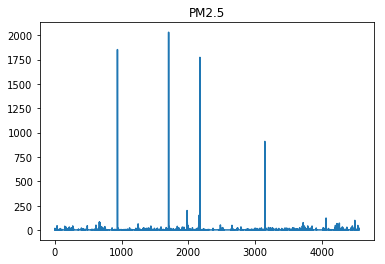

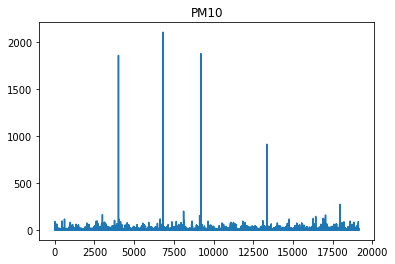

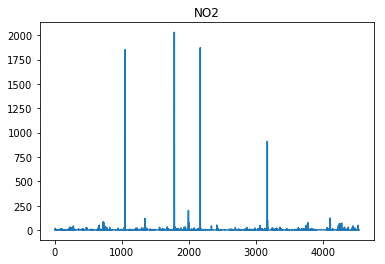

In [75]:
import numpy as np
import matplotlib.pyplot as plt

PM25 = []
PM25 = list(df_bj_aq['PM2.5'])
PM10 = list(df_bj_aq['PM10'])
NO2 = list(df_bj_aq['NO2'])
data = [PM25,PM10,NO2]
duration = []
for each in data:
    duration_temp = []
    temp = 0
    for i in range(len(each)):
        if np.isnan(each[i]):
            temp += 1
        else:
            if temp != 0:
                duration_temp.append(temp)
                temp = 0
    duration.append(duration_temp)
print len(duration)


name = ['PM2.5','PM10','NO2']
for i in range(3):
    plt.plot(duration[i])
    plt.title(name[i])
    plt.show()